In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic["age"] = pd.to_numeric(titanic["age"], errors="coerce")

In [3]:
houses = pd.read_csv("data/kc_house_data.csv")

In [4]:
ufos = pd.read_csv("data/nuforc_reports.csv", parse_dates=['date_time', "posted"])

<AxesSubplot:>

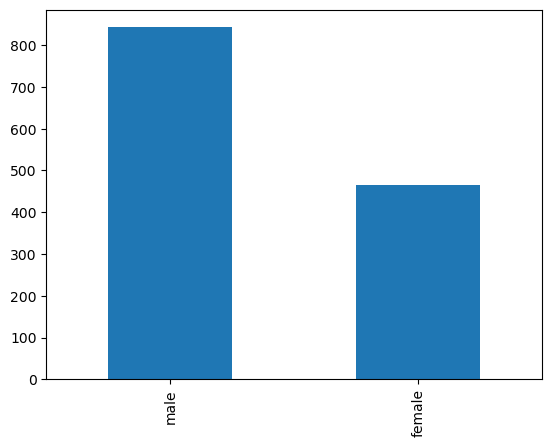

In [5]:
titanic.sex.value_counts().plot(kind="bar")

<AxesSubplot:>

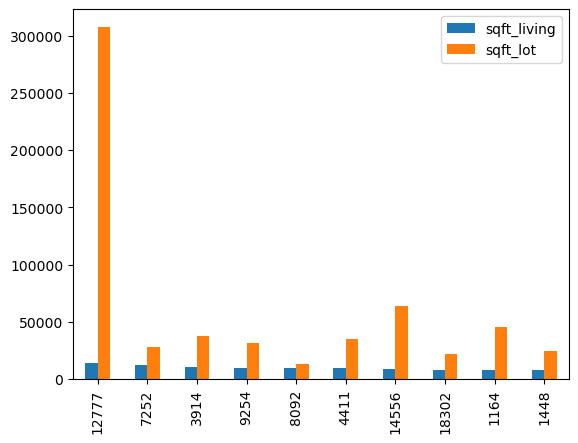

In [6]:
houses[['sqft_living', 'sqft_lot']].sort_values("sqft_living", ascending=False).head(10).plot(kind="bar")

In [7]:
plt.style.use("ggplot")

<AxesSubplot:>

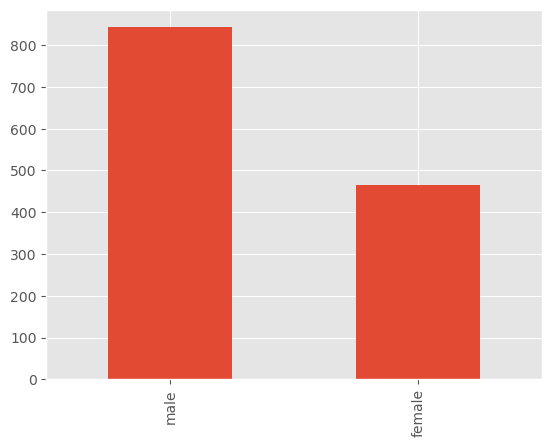

In [8]:
titanic.sex.value_counts().plot(kind="bar")

<AxesSubplot:title={'center':'Sex Breakdown On Titanic'}>

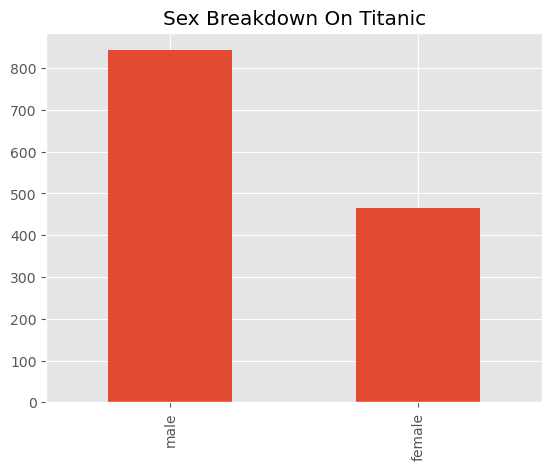

In [9]:
titanic.sex.value_counts().plot(kind="bar", title="Sex Breakdown On Titanic")

In [10]:
ufos["month"] = ufos['date_time'].dt.month
month = {1:"Jan", 2:"Feb",3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul",8:"Aug", 9:"Sep", 10:"Oct",11:"Nov", 12:"Dec"}

Text(0, 0.5, 'Num Sightings')

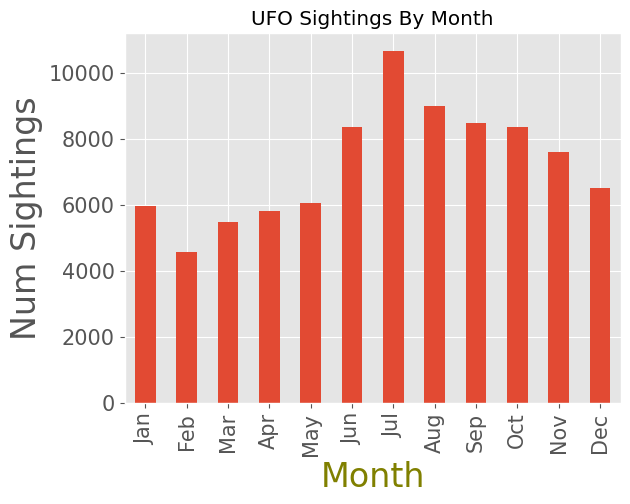

In [11]:
sightings = ufos.month.value_counts().sort_index()
sightings.rename(month).plot(
    kind="bar",
    title="UFO Sightings By Month",
    fontsize=15)
plt.xlabel("Month", fontsize=24, color="olive")
plt.ylabel("Num Sightings", fontsize=24)

In [12]:
sightings.rename(month)

Jan     5979
Feb     4559
Mar     5494
Apr     5817
May     6063
Jun     8357
Jul    10682
Aug     8997
Sep     8498
Oct     8371
Nov     7596
Dec     6525
Name: month, dtype: int64

In [13]:
salaries = pd.read_csv("data/Salaries.csv", low_memory=False)

In [14]:
salaries["BasePay"] = pd.to_numeric(salaries["BasePay"], errors="coerce").fillna(0)
salaries["OvertimePay"] = pd.to_numeric(salaries["OvertimePay"], errors="coerce").fillna(0)
salaries["OtherPay"] = pd.to_numeric(salaries["OtherPay"], errors="coerce").fillna(0)

In [15]:
df = salaries[["EmployeeName", "BasePay", "OvertimePay", "OtherPay"]]

In [16]:
df.set_index("EmployeeName", inplace=True)

<AxesSubplot:xlabel='EmployeeName'>

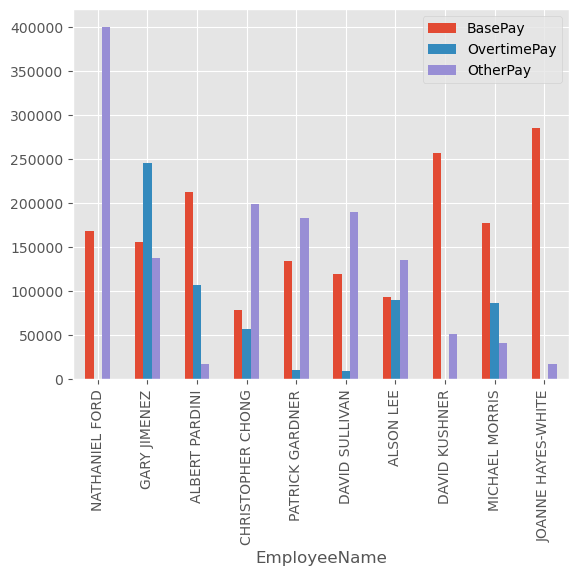

In [17]:
df.head(10).plot(kind="bar")

<AxesSubplot:xlabel='EmployeeName'>

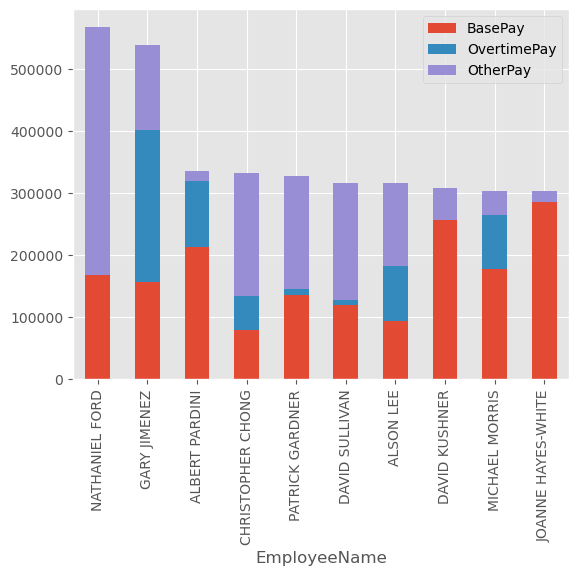

In [18]:
df.head(10).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='EmployeeName'>

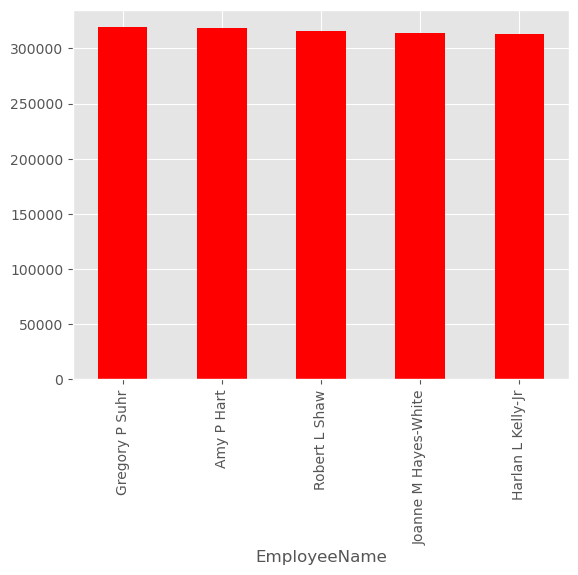

In [19]:
df["BasePay"].sort_values(ascending=False).head().plot.bar(color="red")

<AxesSubplot:ylabel='EmployeeName'>

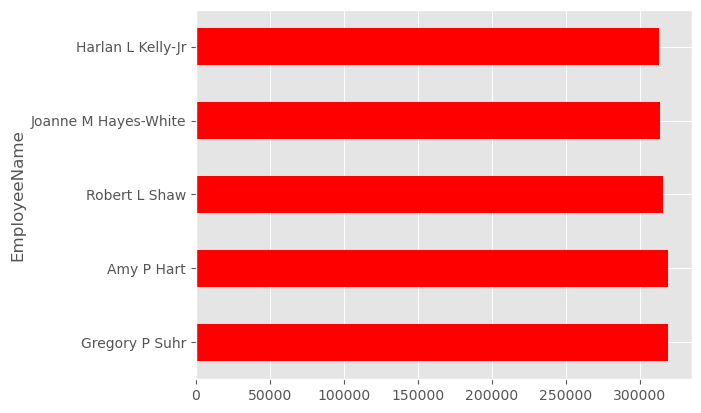

In [20]:
df["BasePay"].sort_values(ascending=False).head().plot.barh(color="red")

Text(0.5, 0, 'Dollars')

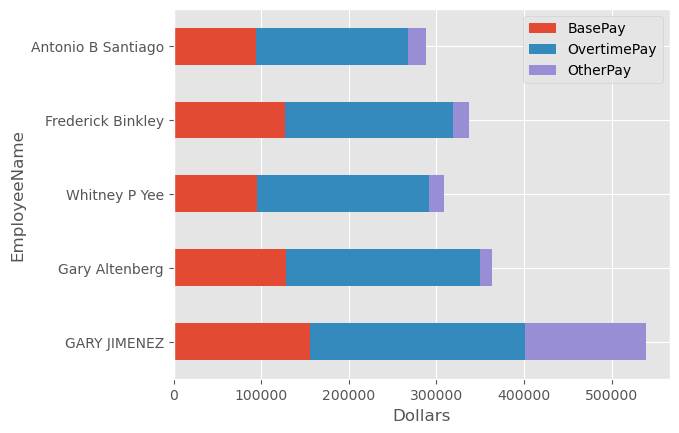

In [21]:
df.sort_values("OvertimePay", ascending=False).head().plot(
    kind="barh",
    stacked=True)
plt.xlabel("Dollars")

In [22]:
charts = pd.read_csv("data/billboard_charts.csv", parse_dates=["date"])

In [23]:
top_10 = charts[charts['rank'] == 1]['artist'].value_counts().head(10)

Text(0.5, 0, 'Weeks At 1')

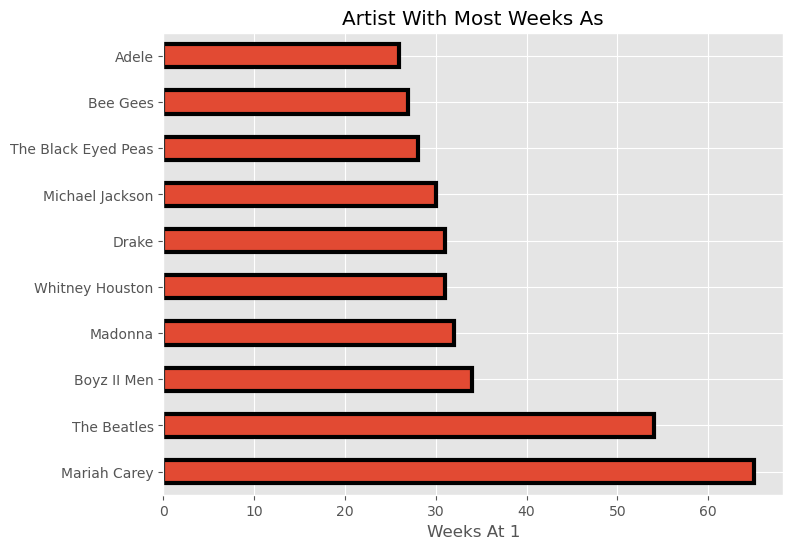

In [24]:
top_10.plot(
    kind='barh',
    title="Artist With Most Weeks As",
    figsize=(8,6),
    edgecolor="black",
    linewidth=3
)
plt.xlabel("Weeks At 1")

<AxesSubplot:ylabel='Frequency'>

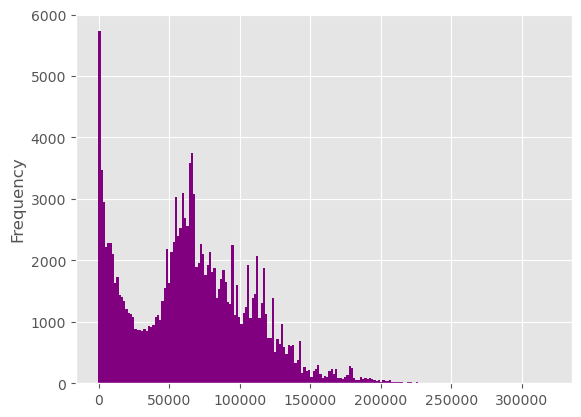

In [25]:
df["BasePay"].plot(kind="hist", bins=200, color="purple")

<AxesSubplot:ylabel='Frequency'>

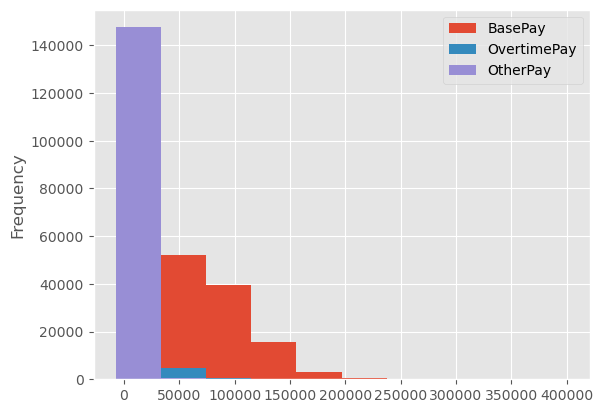

In [26]:
df.plot(kind="hist")

<AxesSubplot:title={'center':'SF Salaries'}, ylabel='Frequency'>

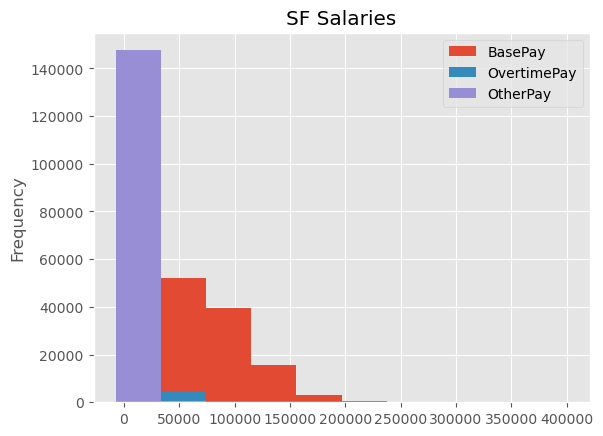

In [27]:
df.plot.hist(title="SF Salaries")

array([[<AxesSubplot:title={'center':'BasePay'}>,
        <AxesSubplot:title={'center':'OvertimePay'}>],
       [<AxesSubplot:title={'center':'OtherPay'}>, <AxesSubplot:>]],
      dtype=object)

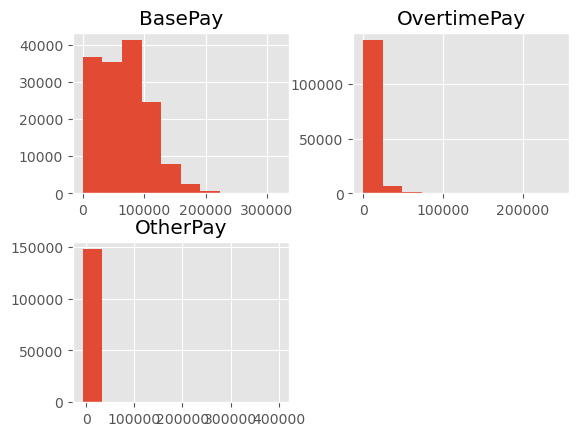

In [28]:
df.hist()

<AxesSubplot:>

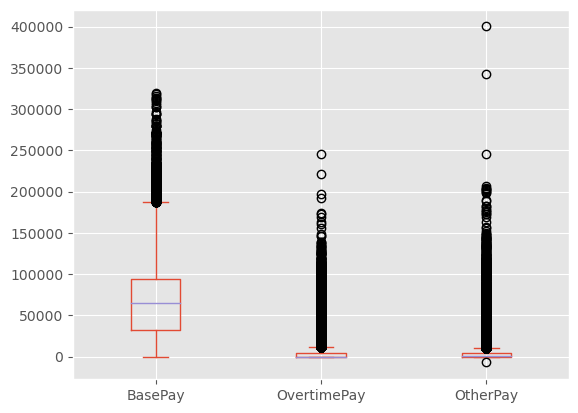

In [29]:
df.plot(kind="box")

<AxesSubplot:>

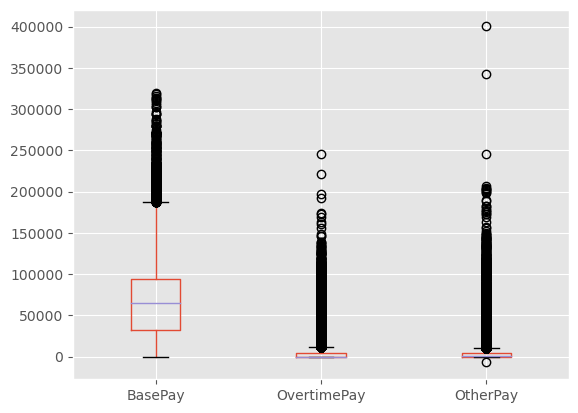

In [30]:
df.boxplot()

<AxesSubplot:>

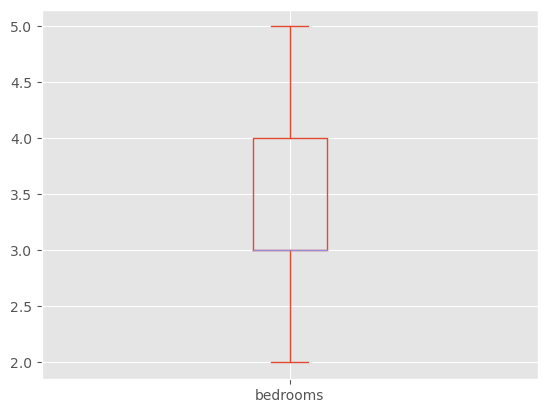

In [31]:
houses.bedrooms.plot(kind="box", showfliers=False)

<AxesSubplot:>

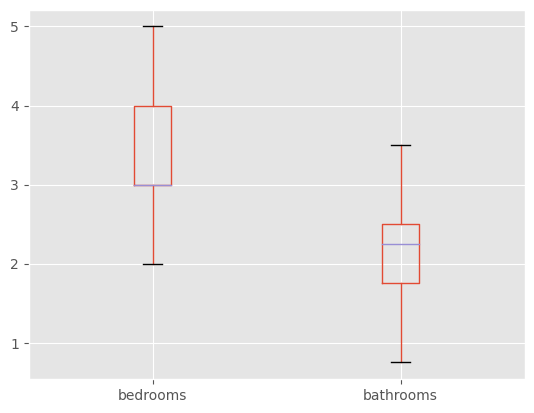

In [32]:
houses[["bedrooms", "bathrooms"]].boxplot(showfliers=False)

In [33]:
ufos['year'] = ufos['date_time'].dt.year

<AxesSubplot:>

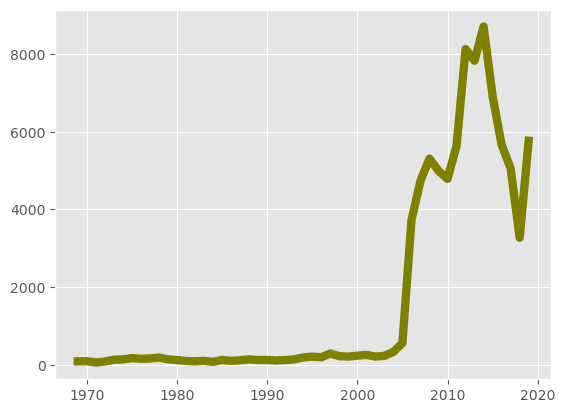

In [34]:
ufos.year.value_counts().sort_index().plot(kind="line", color="olive", linewidth=6)

Где всплеск популярности, там возможно был создан веб-сайт для записи о наблюдениях.

<AxesSubplot:xlabel='EmployeeName'>

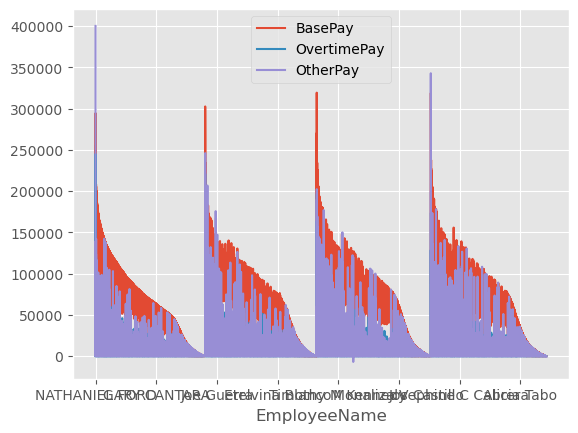

In [35]:
df.plot.line()

<AxesSubplot:xlabel='bedrooms'>

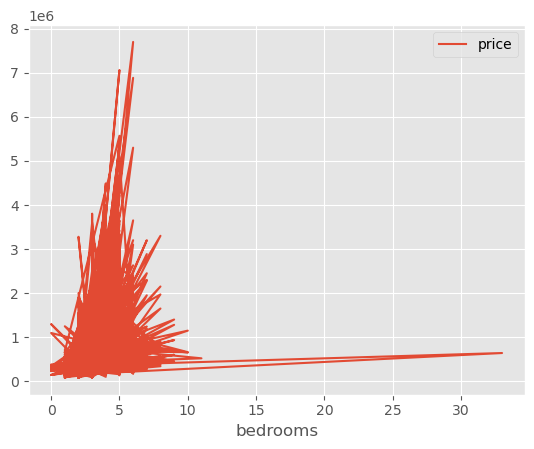

In [36]:
houses.plot.line(x="bedrooms",y="price")

In [37]:
colors = ["#6c5ce7", "#00cec9", "#74b9ff"]

<AxesSubplot:title={'center':'Please Mr. Postman Versions'}, ylabel='artist'>

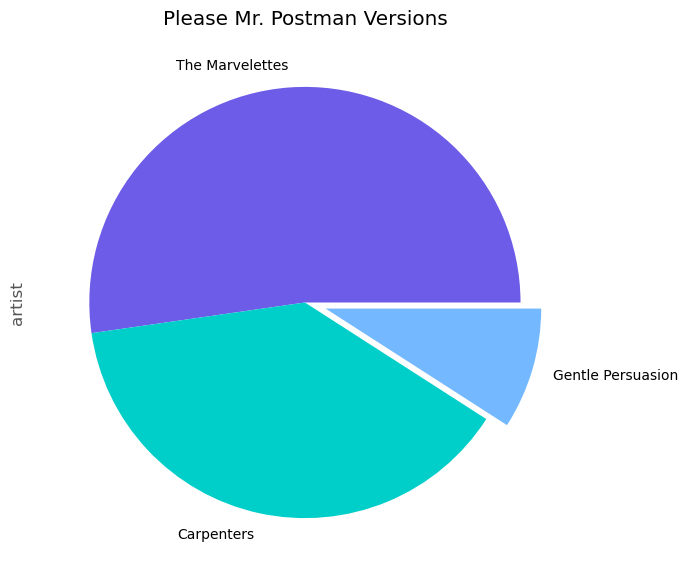

In [38]:
charts[charts['song'] == "Please Mr. Postman"]['artist'].value_counts().plot(
    figsize=(7,7),
    kind="pie",
    title="Please Mr. Postman Versions",
    colors=colors,
    explode=(0,0,0.1))

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

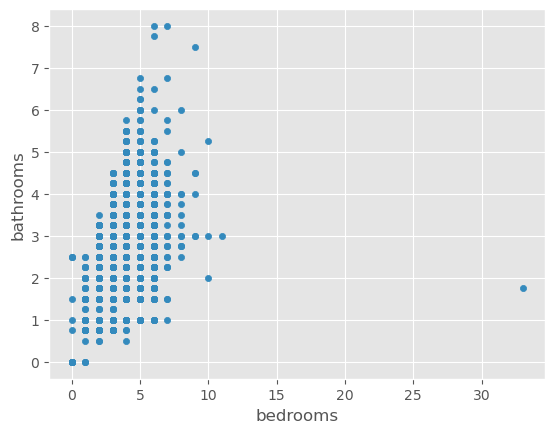

In [39]:
houses.plot.scatter(x="bedrooms", y="bathrooms")

В данной статистике есть несколько особняков, например , более 30 спален, или , второй особняк - это 8 ванных.

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

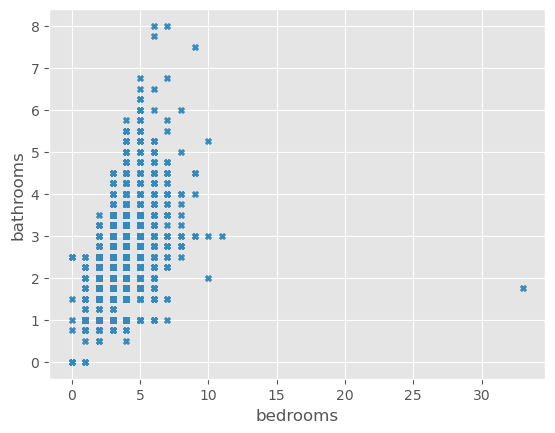

In [40]:
houses.plot.scatter(x="bedrooms", y="bathrooms", marker="X")

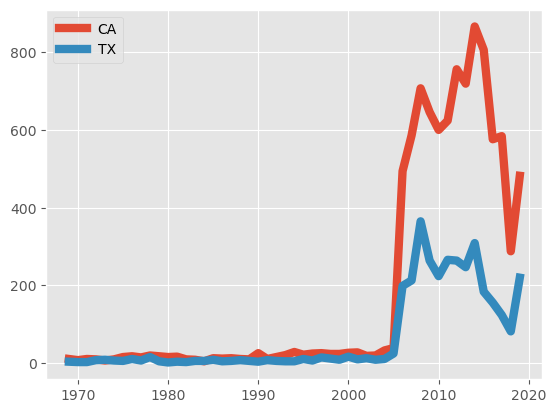

In [41]:
ufos[ufos["state"] == "CA"].year.value_counts().sort_index().plot(label="CA",linewidth=6)
ufos[ufos["state"] == "TX"].year.value_counts().sort_index().plot(label="TX",linewidth=6)
plt.legend()

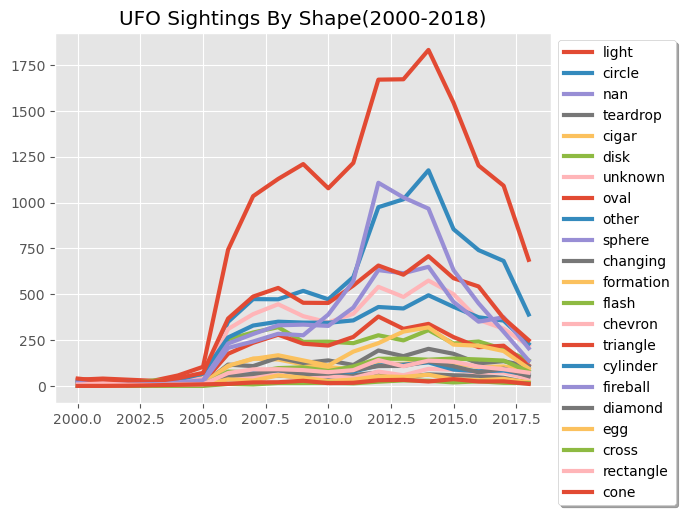

In [42]:
ufo_shape = ufos["shape"].unique()
for i in ufo_shape:
    circle = ufos[ufos["shape"]== i]
    circle[circle["date_time"].dt.year.between(2000,2018)]['date_time'].dt.year.value_counts().sort_index().plot(
        kind="line",
        label=i,
        linewidth=3)
    plt.legend(shadow=True, frameon=True, facecolor="white",bbox_to_anchor=(1, 1))
    plt.title("UFO Sightings By Shape(2000-2018)")
    

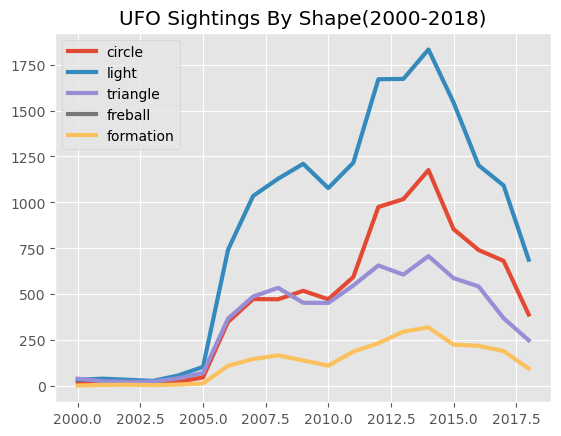

In [43]:
ufo_shape = ['circle','light', 'triangle','freball', 'formation']
for i in ufo_shape:
    circle = ufos[ufos["shape"]== i]
    circle[circle["date_time"].dt.year.between(2000,2018)]['date_time'].dt.year.value_counts().sort_index().plot(
        kind="line",
        label=i,
        linewidth=3)
    plt.legend()
    plt.title("UFO Sightings By Shape(2000-2018)")

In [44]:
charts

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


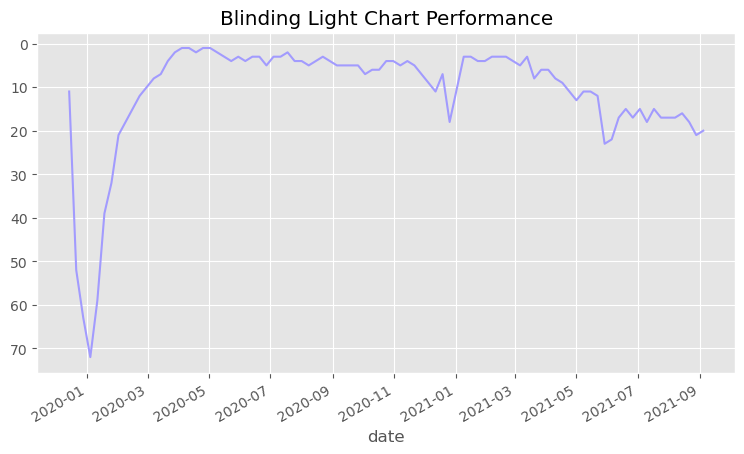

In [45]:
charts[charts['song']== "Blinding Lights"].set_index("date")["rank"].plot(
    kind="line",
    figsize=(9,5),
    title="Blinding Light Chart Performance",
    color='#a29bfe')
plt.gca().invert_yaxis()

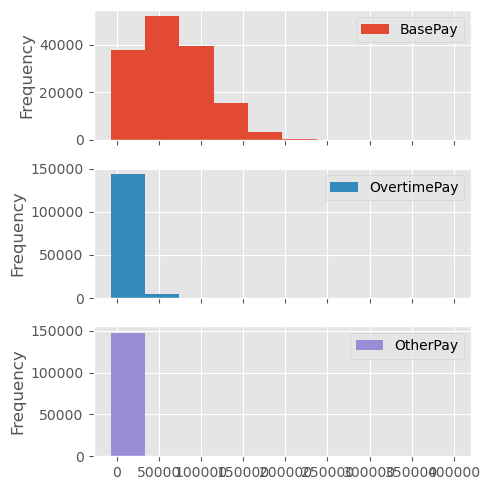

In [46]:
df.plot(kind="hist", subplots=True,figsize=(5,5))
plt.tight_layout()

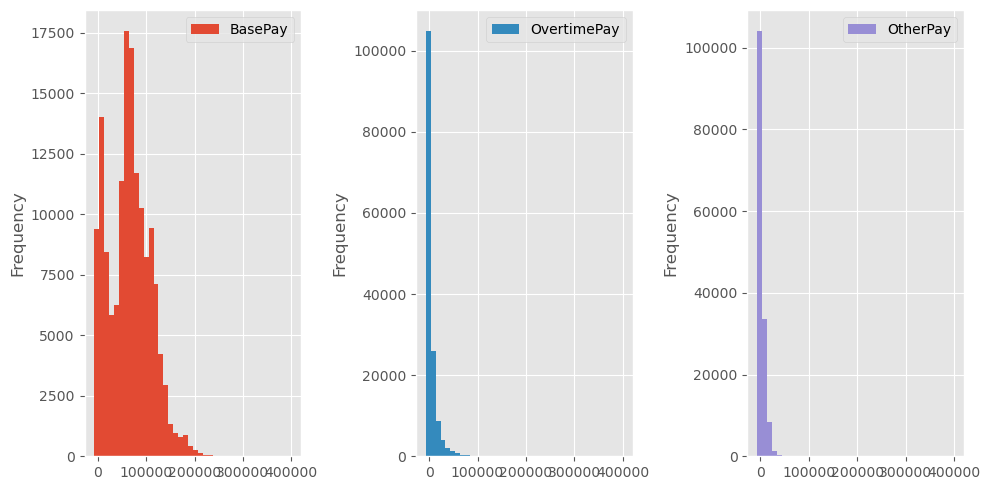

In [47]:
df.plot(kind="hist", subplots=True,layout=(1,3),figsize=(10,5), bins=40)
plt.tight_layout()

Text(0.5, 1.0, 'First')

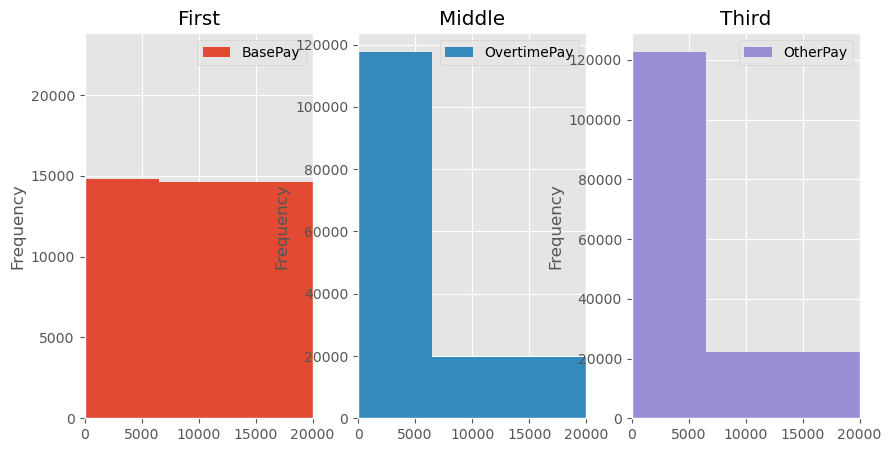

In [48]:
axs = df.plot(kind="hist", subplots=True,layout=(1,3),figsize=(10,5), bins=30)
axs[0][2].set_xlim(0,20000)
axs[0][2].set_title("Third")
axs[0][1].set_title("Middle")
axs[0][0].set_title("First")

<AxesSubplot:>

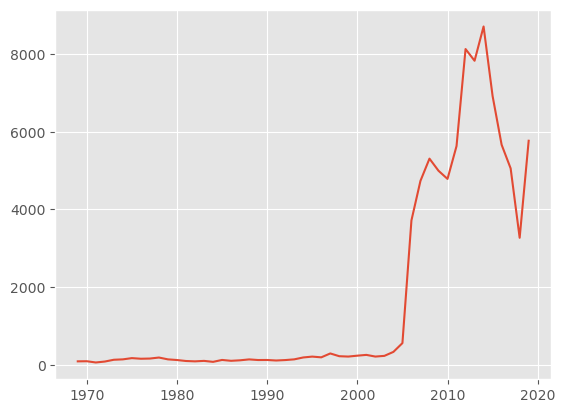

In [49]:
ufos.year.value_counts().sort_index().plot(kind="line")

Text(0.5, 1.0, 'Sightings By Month')

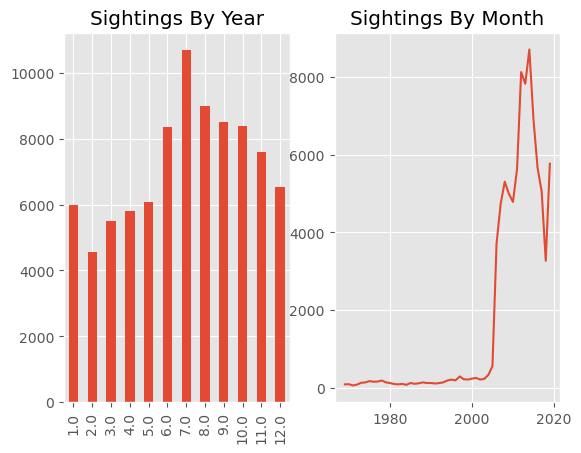

In [50]:
fig, axs = plt.subplots(1,2)
ufos.month.value_counts().sort_index().plot(kind="bar", ax=axs[0])
axs[0].set_title("Sightings By Year")
ufos.year.value_counts().sort_index().plot(kind="line", ax=axs[1])
axs[1].set_title("Sightings By Month")

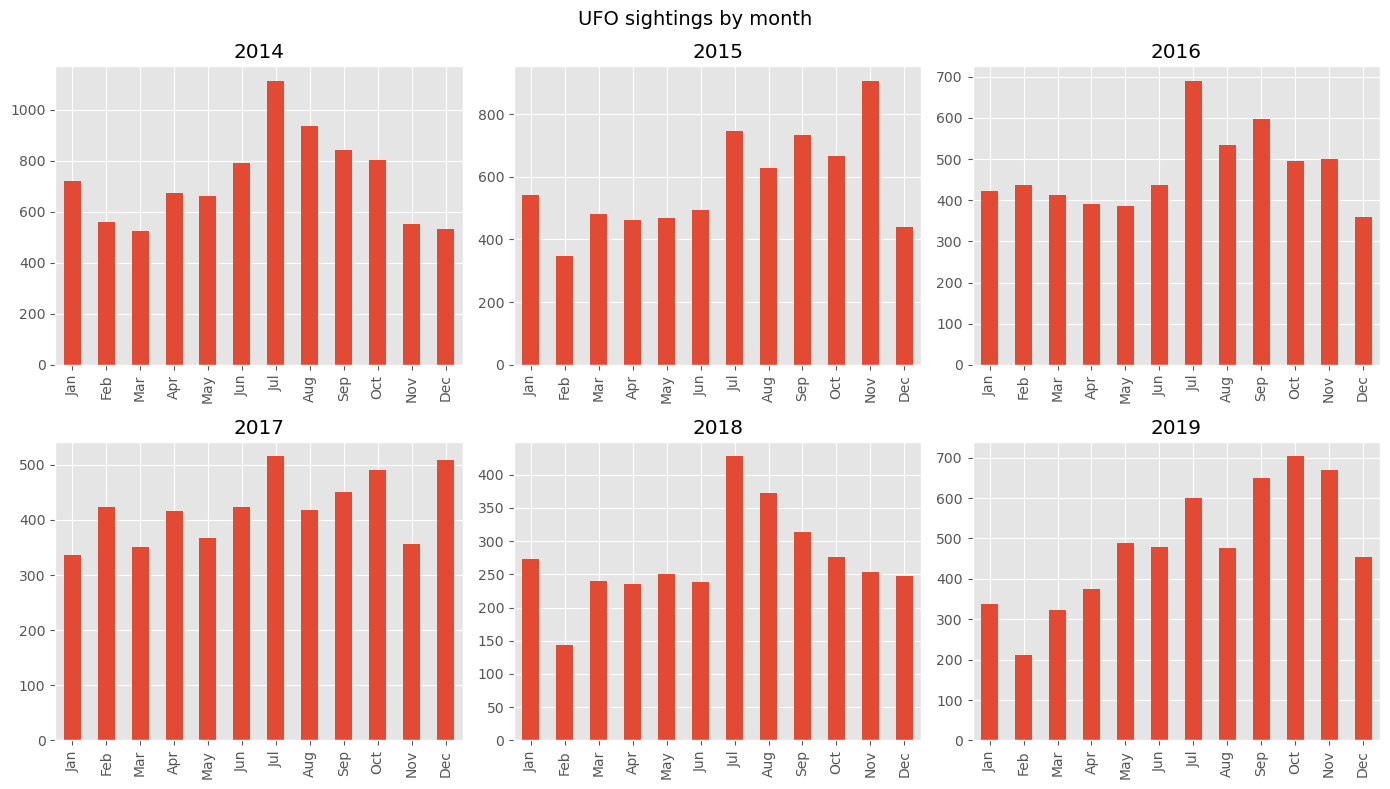

In [51]:
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
         7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
fig, axs = plt.subplots(2,3,figsize=(14,8))
fig.suptitle("UFO sightings by month", fontsize=14)
fig.tight_layout(pad=2)
ufos[ufos.year == 2014].month.value_counts().sort_index().rename(months).plot(kind="bar", ax= axs[0,0],title='2014')
ufos[ufos.year == 2015].month.value_counts().sort_index().rename(months).plot(kind="bar", ax= axs[0,1],title='2015')
ufos[ufos.year == 2016].month.value_counts().sort_index().rename(months).plot(kind="bar", ax= axs[0,2],title='2016')
ufos[ufos.year == 2017].month.value_counts().sort_index().rename(months).plot(kind="bar", ax= axs[1,0],title='2017')
ufos[ufos.year == 2018].month.value_counts().sort_index().rename(months).plot(kind="bar", ax= axs[1,1],title='2018')
ufos[ufos.year == 2019].month.value_counts().sort_index().rename(months).plot(kind="bar", ax= axs[1,2],title='2019')
plt.tight_layout()

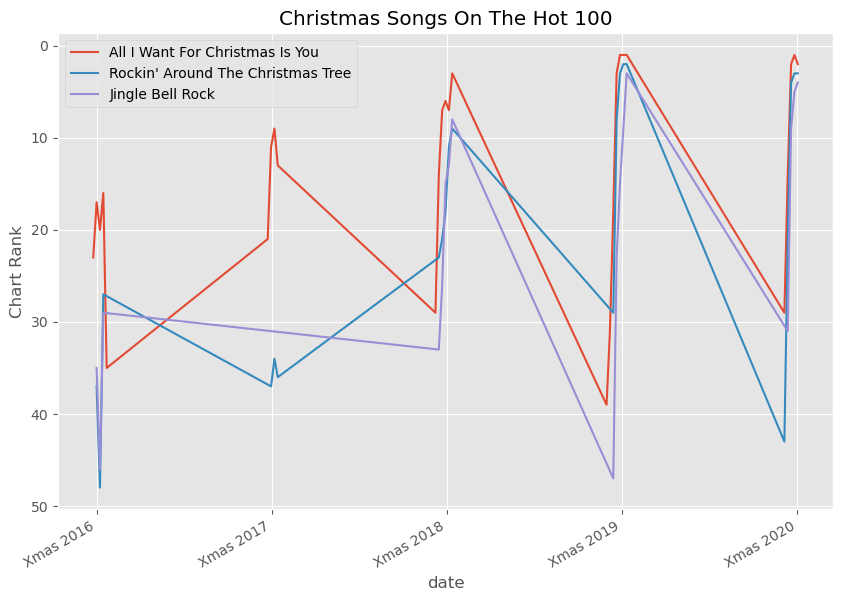

In [52]:
o_charts = charts[charts['date'].between("2016-12-05", "2021-01-01")].set_index("date")

all_i_want = o_charts[o_charts["song"] == "All I Want For Christmas Is You"]
rockin = o_charts[(o_charts['song'] == "Rockin' Around The Christmas Tree")&(o_charts['artist'] == "Brenda Lee")]
jingle = o_charts[o_charts["song"] == "Jingle Bell Rock"]


plt.figure(figsize=(10,7))




all_i_want['rank'].plot(kind="line", label="All I Want For Christmas Is You")
rockin['rank'].plot(kind="line", label="Rockin' Around The Christmas Tree")
jingle['rank'].plot(kind="line", label="Jingle Bell Rock")
plt.legend()
plt.ylabel("Chart Rank")
plt.title("Christmas Songs On The Hot 100")
plt.xticks(['2016-12-25','2017-12-25','2018-12-25','2019-12-25','2020-12-25'],
          labels = ["Xmas 2016", "Xmas 2017","Xmas 2018","Xmas 2019","Xmas 2020"])

plt.gca().invert_yaxis()

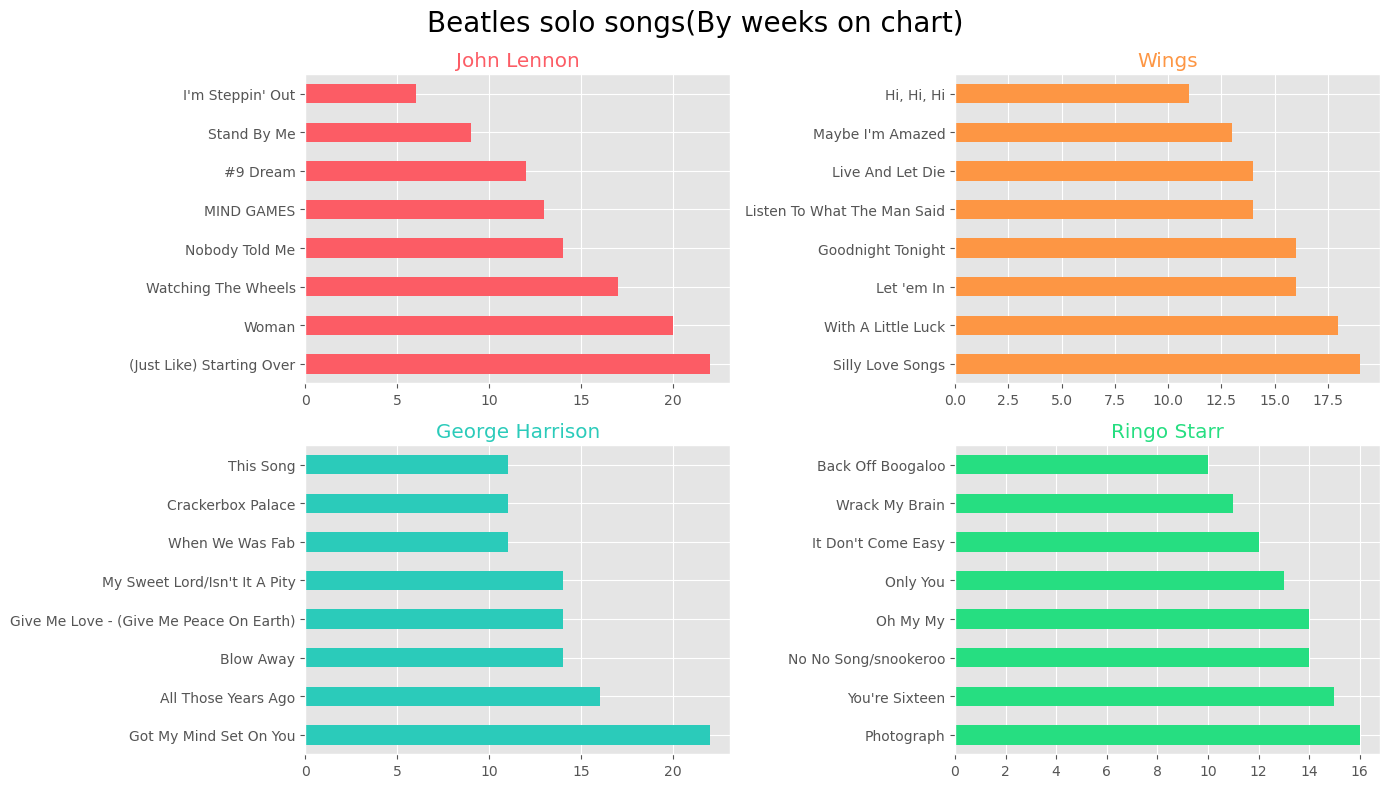

In [53]:
fig, axs = plt.subplots(2,2, figsize=(14,8))

charts[charts["artist"]=='John Lennon']['song'].value_counts(ascending=False).plot(
    ax=axs[0,0],
    kind="barh",
    color='#fc5c65',
    title='John Lennon')
axs[0,0].set_title('John Lennon', color='#fc5c65')
charts[charts["artist"]=='Wings']['song'].value_counts(ascending=False).head(8).plot(
    ax=axs[0,1],
    kind="barh",
    color='#fd9644',
    title='Wings')
axs[0,1].set_title('Wings', color='#fd9644')
charts[charts["artist"]=='George Harrison']['song'].value_counts(ascending=False).head(8).plot(
    ax=axs[1,0],
    kind="barh",
    color='#2bcbba')
axs[1,0].set_title('George Harrison', color='#2bcbba')
charts[charts["artist"]=='Ringo Starr']['song'].value_counts(ascending=False).head(8).plot(
    ax=axs[1,1],
    kind="barh",
    color='#26de81')
axs[1,1].set_title('Ringo Starr', color='#26de81')
fig.suptitle("Beatles solo songs(By weeks on chart)", fontsize=20)
fig.tight_layout()
